Data source: https://www.kaggle.com/ronitf/heart-disease-uci. In this exercise, we aim to finalize a model best suited for predicting the possibility of an individual to have heart disease, based on various features.

In [1]:
#calling all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Data information

In [2]:
# dataset
df=pd.read_csv("heart.csv")


# Understanding dataset

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#column names of the dataset
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
#renaming columns for better understanding
df = df.rename(columns={'cp':'Chest Pain' , 'trestbps':'BP','chol':'cholesterol','fbs':'fasting blood sugar','restecg':'Resting ECG','thalach':'Max Heart Rate','exang':'exercise induced angina','thal':'Thalassemia','num       ':'object'})
df

,age,sex,Chest Pain,BP,cholesterol,fasting blood sugar,Resting ECG,Max Heart Rate,exercise induced angina,oldpeak,slope,ca,Thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Exploratory Data Analysis

In [6]:
#display first 5 rows
df.head()

,age,sex,Chest Pain,BP,cholesterol,fasting blood sugar,Resting ECG,Max Heart Rate,exercise induced angina,oldpeak,slope,ca,Thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
#display last 5 rows
df.tail()

,age,sex,Chest Pain,BP,cholesterol,fasting blood sugar,Resting ECG,Max Heart Rate,exercise induced angina,oldpeak,slope,ca,Thalassemia,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [8]:
#size of dataset
df.shape

(303, 14)

In [9]:
#column names of dataset after renaming
df.columns

Index(['age', 'sex', 'Chest Pain', 'BP', 'cholesterol', 'fasting blood sugar',
       'Resting ECG', 'Max Heart Rate', 'exercise induced angina', 'oldpeak',
       'slope', 'ca', 'Thalassemia', 'target'],
      dtype='object')

In [10]:
#information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   Chest Pain               303 non-null    int64  
 3   BP                       303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting blood sugar      303 non-null    int64  
 6   Resting ECG              303 non-null    int64  
 7   Max Heart Rate           303 non-null    int64  
 8   exercise induced angina  303 non-null    int64  
 9   oldpeak                  303 non-null    float64
 10  slope                    303 non-null    int64  
 11  ca                       303 non-null    int64  
 12  Thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [11]:
#statistical description of dataset
df.describe()

,age,sex,Chest Pain,BP,cholesterol,fasting blood sugar,Resting ECG,Max Heart Rate,exercise induced angina,oldpeak,slope,ca,Thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
#checking null values in dataset
df.isnull().sum()

age                        0
sex                        0
Chest Pain                 0
BP                         0
cholesterol                0
fasting blood sugar        0
Resting ECG                0
Max Heart Rate             0
exercise induced angina    0
oldpeak                    0
slope                      0
ca                         0
Thalassemia                0
target                     0
dtype: int64

No missing values in the dataset

In [13]:
#data types of datase values
df.dtypes

age                          int64
sex                          int64
Chest Pain                   int64
BP                           int64
cholesterol                  int64
fasting blood sugar          int64
Resting ECG                  int64
Max Heart Rate               int64
exercise induced angina      int64
oldpeak                    float64
slope                        int64
ca                           int64
Thalassemia                  int64
target                       int64
dtype: object

In [14]:
#unique values in data set
df.nunique()

age                         41
sex                          2
Chest Pain                   4
BP                          49
cholesterol                152
fasting blood sugar          2
Resting ECG                  3
Max Heart Rate              91
exercise induced angina      2
oldpeak                     40
slope                        3
ca                           5
Thalassemia                  4
target                       2
dtype: int64

As the target variable("Target" column) and many other associated variables are categorical, Classification type of Supervised Machine Learning algorithm is adopted in this project.

In [15]:
#correlation of dataset
df.corr()

,age,sex,Chest Pain,BP,cholesterol,fasting blood sugar,Resting ECG,Max Heart Rate,exercise induced angina,oldpeak,slope,ca,Thalassemia,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
Chest Pain,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
BP,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
cholesterol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fasting blood sugar,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
Resting ECG,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
Max Heart Rate,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exercise induced angina,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


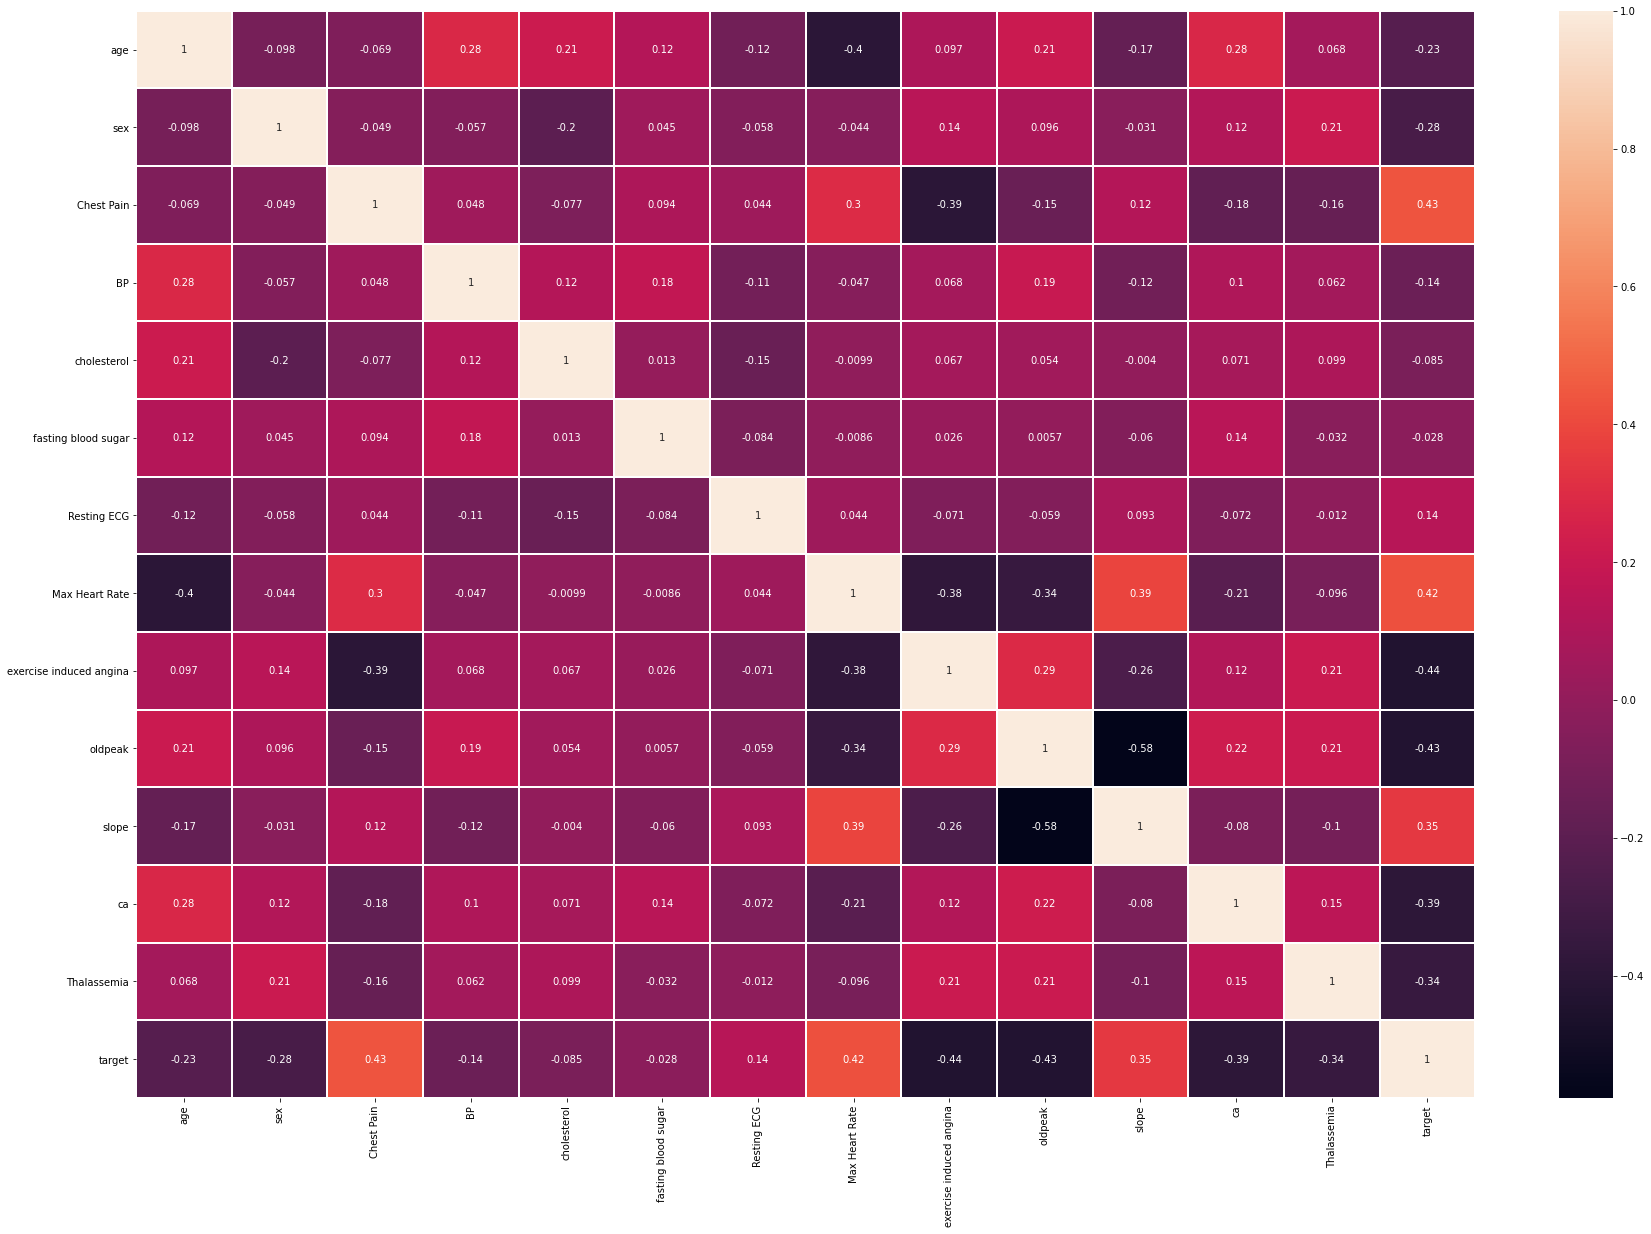

In [16]:
correlation_matrix=df.corr()
plt.figure(figsize=(30,20))
sns.heatmap(correlation_matrix, annot = True, linewidths = 1)
plt.show()


In [17]:
#finding correlation of all the features with respect to Target
corr=df.corr()['target'].sort_values(ascending=False)
print(corr)

target                     1.000000
Chest Pain                 0.433798
Max Heart Rate             0.421741
slope                      0.345877
Resting ECG                0.137230
fasting blood sugar       -0.028046
cholesterol               -0.085239
BP                        -0.144931
age                       -0.225439
sex                       -0.280937
Thalassemia               -0.344029
ca                        -0.391724
oldpeak                   -0.430696
exercise induced angina   -0.436757
Name: target, dtype: float64


In [18]:
df.head(2)

,age,sex,Chest Pain,BP,cholesterol,fasting blood sugar,Resting ECG,Max Heart Rate,exercise induced angina,oldpeak,slope,ca,Thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


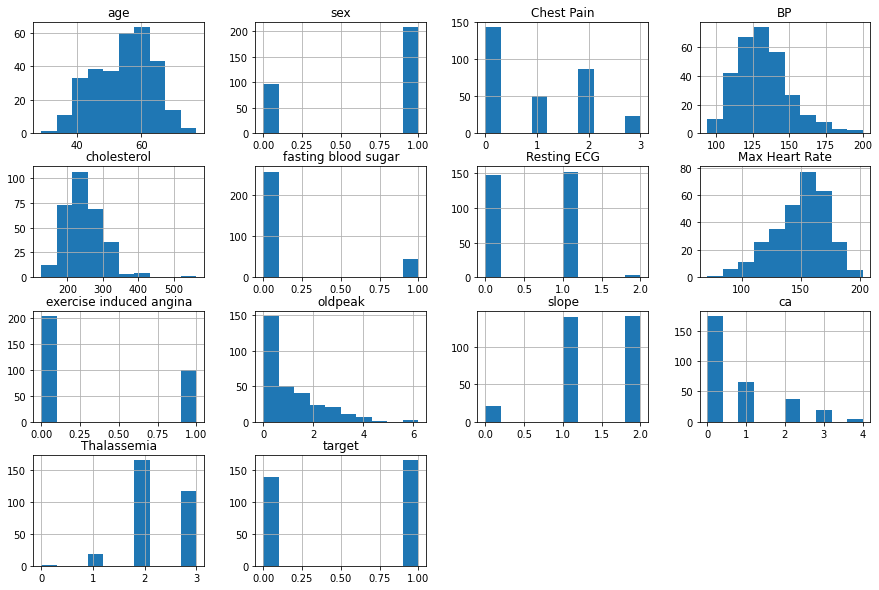

In [19]:
#Univariate analysis, to observe trend in variations in the dataset:
df.hist(figsize=(15,10));

Text(0.5, 1.0, 'Target distribution counts')

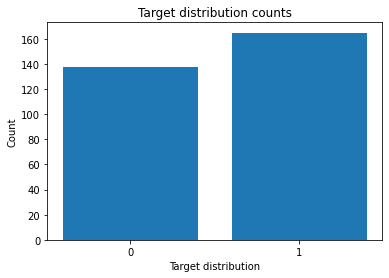

In [20]:
plt.bar(df['target'].unique(), df['target'].value_counts())
plt.xticks([0, 1])
plt.xlabel('Target distribution')
plt.ylabel('Count')
plt.title('Target distribution counts')

Target data set is balanced. 

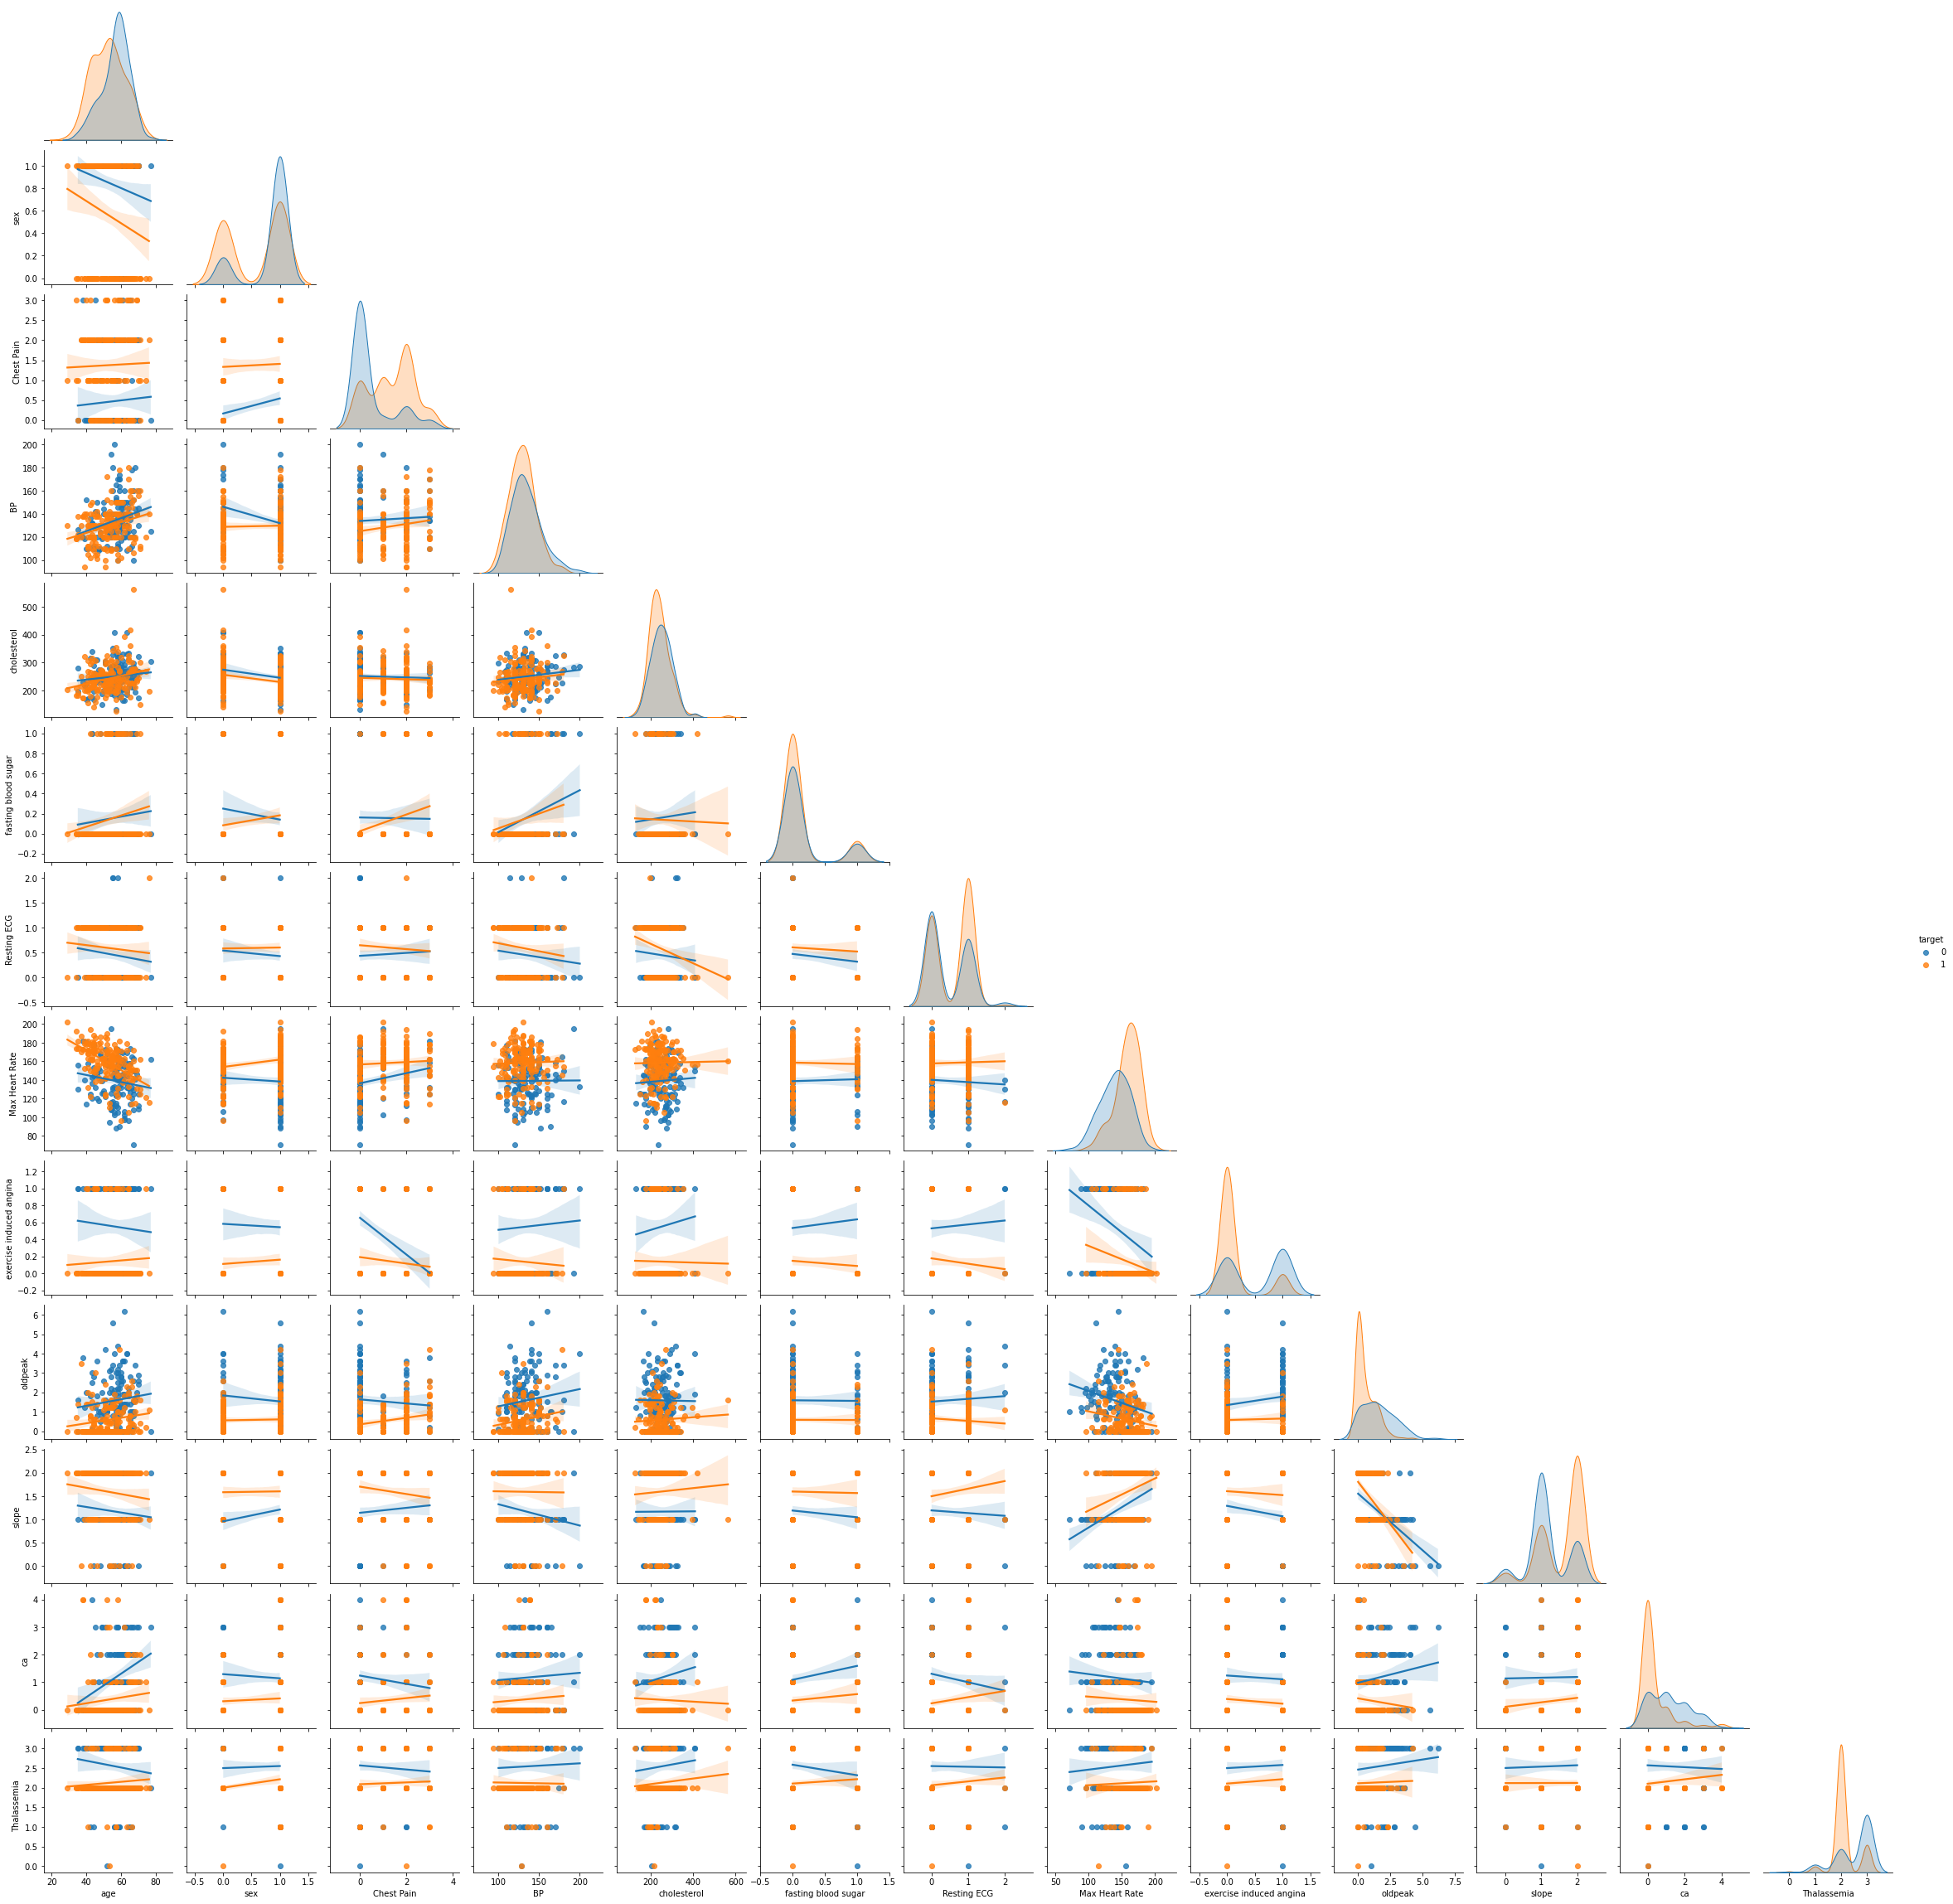

In [21]:
sns.pairplot(df,hue='target', kind = 'reg', corner=True)

From the pairplot, we observe pattern between the features with respect to the target variable, Price. As it is a categorical variable,we model the features using following algorithms used for Classification methodologies under Supervised learning: Decision Tree Classifier, Random Forest Classifier after splitting the data into 80% trained data and 20% test data. After checking for accuracy of predictions, we finalize the most suitable algorithm to predict the possibility of an individual to have heart disease

# Machine Learning methodologies

Splitting dataset into train set and test set

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y = df['target']
X = df.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print('Shape of X and y respectively (train) :', X_train.shape, y_train.shape)
print('Shape of X and y respectively (test) :', X_test.shape, y_test.shape)

Shape of X and y respectively (train) : (242, 13) (242,)
Shape of X and y respectively (test) : (61, 13) (61,)


# Decision Tree Classifier method

In [26]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(X_train,y_train)
DTC_prediction=DTC.predict(X_test)
DTC_trainaccuracy = DTC.score(X_train,y_train)
DTC_testaccuracy = DTC.score(X_test,y_test)
print("Accuracy of Decision Tree Classifier on trained dataset is ",DTC_trainaccuracy) 
print("Accuracy of Decision Tree Classifier on test dataset is ",DTC_testaccuracy)

Accuracy of Decision Tree Classifier on trained dataset is  1.0
Accuracy of Decision Tree Classifier on test dataset is  0.7540983606557377


In [27]:
print(classification_report(y_test, DTC_prediction))


              precision    recall  f1-score   support

           0       0.70      0.78      0.74        27
           1       0.81      0.74      0.77        34

    accuracy                           0.75        61
   macro avg       0.75      0.76      0.75        61
weighted avg       0.76      0.75      0.75        61



In [28]:
confusion_matrix1 = confusion_matrix(y_test,DTC_prediction)
confusion_matrix1

array([[21,  6],
       [ 9, 25]], dtype=int64)

# Random Forest Classification method

In [40]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train,y_train)
RF_prediction=RF.predict(X_test)
RF_trainaccuracy = RF.score(X_train,y_train)
RF_testaccuracy = RF.score(X_test,y_test)
print("Accuracy of Random Forest Classifier on trained dataset is ",RF_trainaccuracy) 
print("Accuracy of Random Forest Classifier on test dataset is ",RF_testaccuracy)

Accuracy of Random Forest Classifier on trained dataset is  1.0
Accuracy of Random Forest Classifier on test dataset is  0.8852459016393442


In [41]:
print(classification_report(y_test, RF_prediction))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.89      0.91      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



In [42]:
confusion_matrix2 = confusion_matrix(y_test,RF_prediction)
confusion_matrix2

array([[23,  4],
       [ 3, 31]], dtype=int64)

<AxesSubplot:title={'center':'Ranom Forest Confusion Matrix'}>

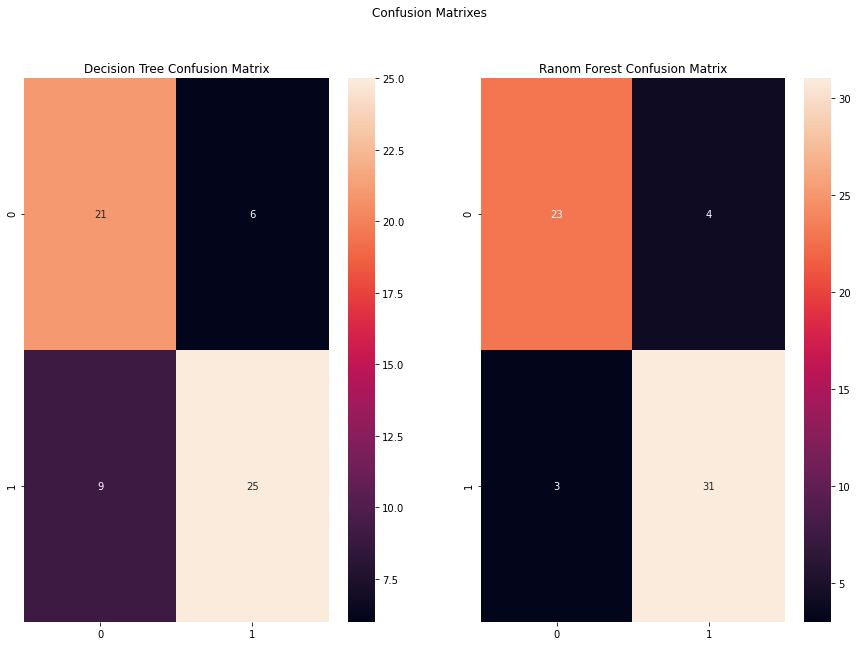

In [43]:
plt.figure(figsize=(15,10))

plt.suptitle("Confusion Matrixes")

plt.subplot(1,2,1)
plt.title("Decision Tree Confusion Matrix")
sns.heatmap(confusion_matrix1,annot=True)

plt.subplot(1,2,2)
plt.title("Ranom Forest Confusion Matrix")
sns.heatmap(confusion_matrix2,annot=True)

# Conclusion

Dataset was trained and tested with maximum scores, using below 2 methods of classification, with accuracy rate:

Decision Tree Classifier: 75%; 
Random Forest Classifier: 88%
    
Random Tree Classifier thus, is found to be the best model to predict Heart Disease Analysis